![Gesund](https://egirisim.com/wp-content/uploads/2023/08/gesund-ai-1068x580.jpg)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gesund-ai/gesund/blob/main/gesund/examples/object_detection_malaria.ipynb)

# Object Detection on Malaria Dataset 

This notebook provides and example of Gesund Validation with Object Detection

The notebook could be outlined as follows

- [Introduction](#intro)
- [Data Source](#data_source)
- [Basic Usage](#usage)
- [Explore Results](#results)

## <a id='intro'>Introduction</a>


To learn more about Gesundai Validation tool, Please visit the link <a href="https://gesund-ai.github.io/#gesund-ai">here</a>.

Please ensure you have installed the as per the installation instructions <a href="https://gesund-ai.github.io/user_guide.html#installation">here</a>.




## <a id='data_source'>Data Source</a>

### Dataset Name: [Malaria Blood Cell](https://app.gesund.ai/data/dataset-details/Dataset10/overview)


To download the required JSON files, run the following commands in a Jupyter notebook cell


In [5]:
# Object Detection Annotation Data
!wget https://raw.githubusercontent.com/gesund-ai/gesund/refs/heads/main/tests/_data/object_detection/gesund_custom_format/annotation.json

# Object Detection Prediction Data
!wget https://raw.githubusercontent.com/gesund-ai/gesund/refs/heads/main/tests/_data/object_detection/gesund_custom_format/prediction.json

# Object Detection Mappings
!wget https://raw.githubusercontent.com/gesund-ai/gesund/refs/heads/main/tests/_data/object_detection/test_class_mappings.json

--2024-12-20 17:33:00--  https://raw.githubusercontent.com/gesund-ai/gesund/refs/heads/main/tests/_data/object_detection/gesund_custom_format/annotation.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 482615 (471K) [text/plain]
Saving to: ‘annotation.json.1’

annotation.json.1   100%[===================>] 471.30K  --.-KB/s    in 0.04s   

2024-12-20 17:33:00 (12.1 MB/s) - ‘annotation.json.1’ saved [482615/482615]

--2024-12-20 17:33:01--  https://raw.githubusercontent.com/gesund-ai/gesund/refs/heads/main/tests/_data/object_detection/gesund_custom_format/prediction.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.co

## <a id='usage'> Basic Usage </a>

It is couple of simple lines of code to run `object detection validation` on your data. 

In [33]:
from gesund import Validation
from gesund.validation._result import ValidationResult
from gesund.core._managers.metric_manager import metric_manager
from gesund.core._managers.plot_manager import plot_manager


In [34]:
import warnings
warnings.filterwarnings("ignore")


def plot_config(problem_type):
    plot_configs = {
        "classification": {
            "class_distributions": {
                "metrics": ["normal", "pneumonia"],
                "threshold": 10,
            },
            "blind_spot": {"class_type": ["Average", "1", "0"]},
            "performance_by_threshold": {
                "graph_type": "graph_1",
                "metrics": [
                    "F1",
                    "Sensitivity",
                    "Specificity",
                    "Precision",
                    "FPR",
                    "FNR",
                ],
                "threshold": 0.2,
            },
            "roc": {"roc_class": ["normal", "pneumonia"]},
            "precision_recall": {"pr_class": ["normal", "pneumonia"]},
            "confidence_histogram": {"metrics": ["TP", "FP"], "threshold": 0.5},
            "overall_metrics": {"metrics": ["AUC", "Precision"], "threshold": 0.2},
            "confusion_matrix": {},
            "prediction_dataset_distribution": {},
            "most_confused_bar": {},
            "confidence_histogram_scatter_distribution": {},
            "lift_chart": {},
        },
        "object_detection": {
            "mixed_plot": {"mixed_plot": ["map10", "map50", "map75"], "threshold": 0.5},
            "top_misses": {"min_miou": 0.70, "top_n": 10},
            "confidence_histogram": {"confidence_histogram_labels": ["TP", "FP"]},
            "classbased_table": {
                "classbased_table_metrics": ["precision", "recall", "f1"],
                "threshold": 0.2,
            },
            "overall_metrics": {
                "overall_metrics_metrics": ["map", "mar"],
                "threshold": 0.5,
            },
            "blind_spot": {
                "blind_spot_Average": ["mAP@50", "mAP@10", "mAR@max=10", "mAR@max=100"],
                "threshold": 0.5,
            },
        },
        "semantic_segmentation": {
            "violin_graph": {"metrics": ["Acc", "Spec", "AUC"], "threshold": 0.5},
            "plot_by_meta_data": {
                "meta_data_args": [
                    "FalsePositive",
                    "Dice Score",
                    "mean Sensitivity",
                    "mean AUC",
                    "Precision",
                    "AverageHausdorffDistance",
                    "SimpleHausdorffDistance",
                ]
            },
            "overall_metrics": {
                "overall_args": ["mean AUC", "fwIoU", "mean Sensitivity"]
            },
            "classbased_table": {"classbased_table_args": 0.5},
            "blind_spot": {
                "blind_spot_args": [
                    "fwIoU",
                    "mean IoU",
                    "mean Sensitivity",
                    "mean Specificity",
                    "mean Kappa",
                    "mean AUC",
                    "",
                ]
            },
        },
    }
    return plot_configs[problem_type]

In [35]:
metric_name = "top_losses"
cohort_id = None
problem_type = "object_detection"
data_dir = f"./tests/_data/{problem_type}"


validator = Validation(
    annotations_path=f"{data_dir}/gesund_custom_format/annotation.json",
    predictions_path=f"{data_dir}/gesund_custom_format/prediction.json",
    class_mapping=f"{data_dir}/test_class_mappings.json",
    problem_type=problem_type,
    data_format="json",
    json_structure_type="gesund",
    plot_config=plot_config(problem_type),
    cohort_args={"selection_criteria": "random"},
    metric_args={"threshold": [0.25, 0.5, 0.75]},
)

validation_results = validator.run()

annotations path validated !
predictions path validated !
class mapping file validated !
Problem Type validated !
JSON structure type validated!
Data format validated!
No metadata path provided.
Running  object_detection.top_losses .....
Running  object_detection.average_precision .....
Running  object_detection.predicted_distribution .....
Running  object_detection.confidence_distribution .....


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


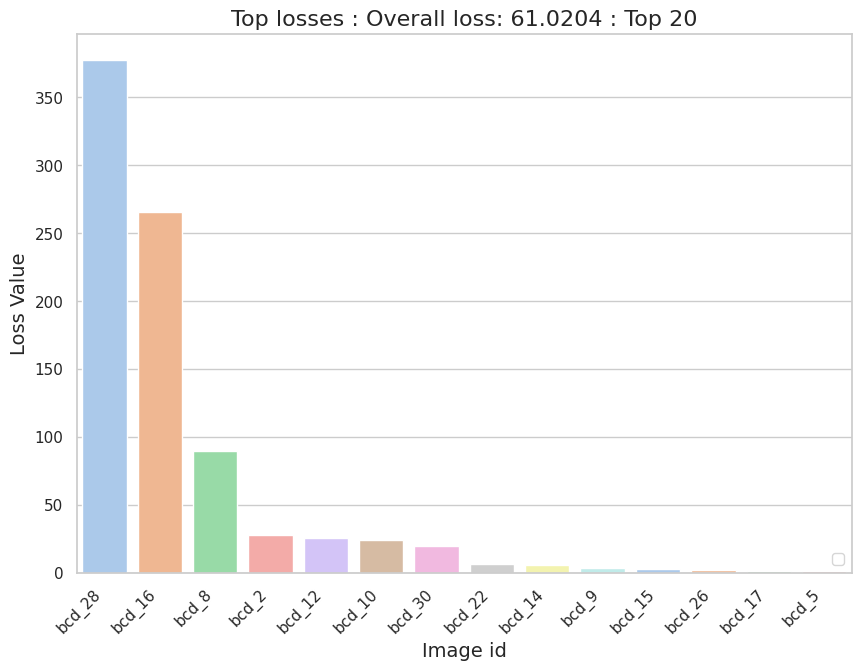

In [36]:
validation_results.plot(metric_name=metric_name, save_plot=False, cohort_id=cohort_id)

In [37]:
validation_results.save(metric_name)

In [38]:
validation_results.__dict__.keys()

dict_keys(['data', 'user_params', 'result', 'cohort_args', 'plot_args'])

#### Class instance attributes

<hr />

1. `data`: A pydantic model following the *UserInputData* that contains all the loaded user data.

2. `user_params`: A pydantic model following the schema *UserInputParams* that contains all the parameters provided.

3. `result`: Stores all computed outputs.

4. `cohort_args`: Defines how subsets of data are chosen for processing.

5. `plot_args`: Holds parameters for customizing the generated plots.


<hr />

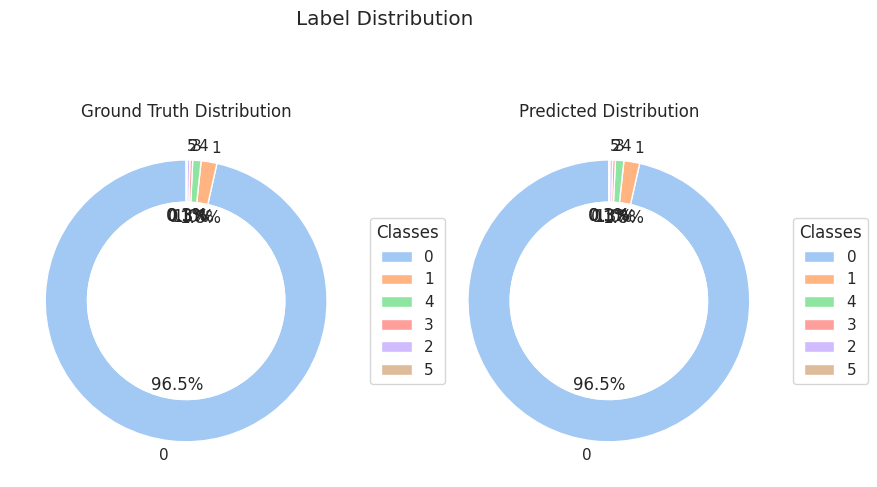

In [39]:
validation_results.plot(metric_name='predicted_distribution', save_plot=False, cohort_id=cohort_id)

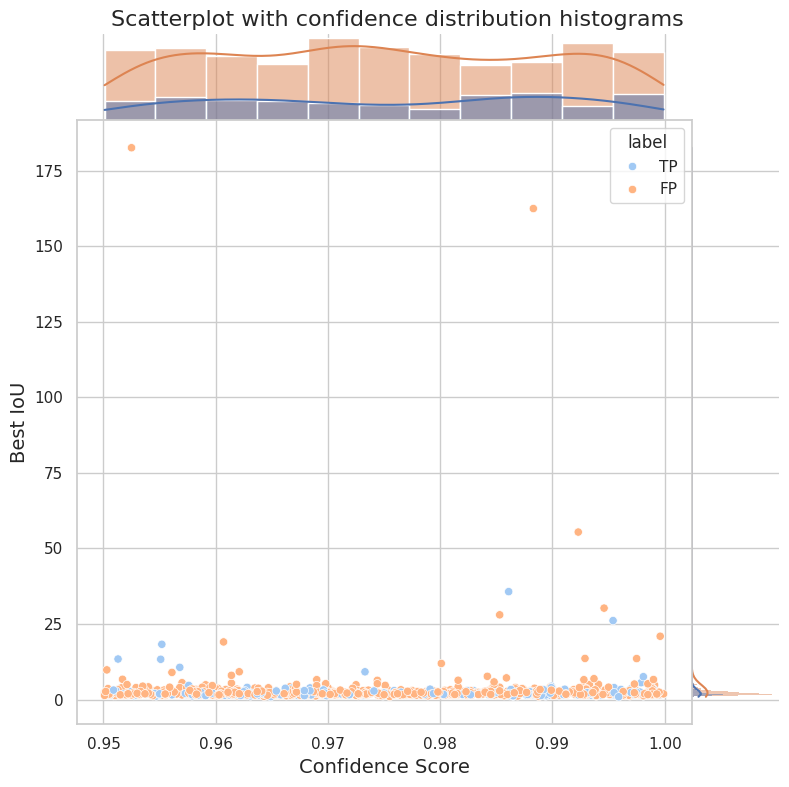

In [40]:
validation_results.plot(metric_name='confidence_distribution', save_plot=False, cohort_id=cohort_id)

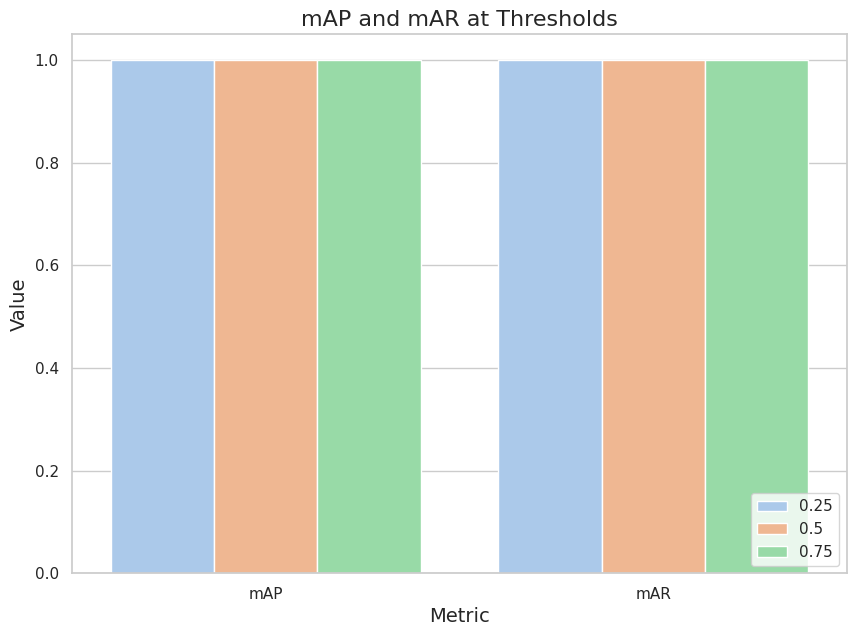

In [41]:
validation_results.plot(metric_name='average_precision', save_plot=False, cohort_id=cohort_id)